In [ ]:
import numpy as np
import cv2

In [ ]:
speakers = ['F01','F02','F04','F05','F06','F07','F08','F09','F10','F11','M01','M02','M04','M07','M08'] 
word_folder = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
varieties = ['01','02','03','04','05','06','07','08', '09', '10']

In [ ]:
X=[]
Y=[]

for speaker in speakers:
  for ind, folder in enumerate(word_folder):
    for vari in varieties:
        mouth = cv2.imread('/content/drive/MyDrive/lip_reading/mouth3/'+speaker+'/'+folder+'/'+vari+'/'+'image.jpg',0)        
        mouth = cv2.resize(mouth, (224,224))             
        mouth = mouth.astype(np.uint8)
        #cv2_imshow(mouth)
        #print(mouth)
        #print('Min: %.3f, Max: %.3f' % (mouth.min(), mouth.max()))
        #mouth=min_max_scl(mouth) 
        mouth = (mouth - np.min(mouth))/(np.max(mouth)-np.min(mouth))
        mouth = np.nan_to_num(mouth)  
        #print('Min: %.3f, Max: %.3f' % (mouth.min(), mouth.max()))  
        #print(mouth)     
        print(speaker)
        print(folder+'-'+vari)        
        mouth = np.array(mouth)
        #ind is word id
        X.append(mouth)
        Y.append(ind)

In [ ]:
print(np.shape(Y))
print(np.shape(X)) 

(3000,)
(3000, 224, 224)


In [ ]:
np.save('/content/drive/MyDrive/lip_reading/datasetNew_x', X)
print(np.shape(X))
np.save('/content/drive/MyDrive/lip_reading/datasetNew_y', Y)
print(np.shape(Y))

(3000, 224, 224)
(3000,)


In [ ]:
X_ = np.load('/content/drive/MyDrive/lip_reading/datasetNew_x.npy')
Y_ = np.load('/content/drive/MyDrive/lip_reading/datasetNew_y.npy')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2, random_state=42)
#X_val, X_test, Y_val, Y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
#print(np.shape(X_train))
#print(np.shape(X_val))
#print(np.shape(X_test))

print(X_train.shape)
#print(X_val.shape)
print(X_test.shape)

(2400, 224, 224)
(600, 224, 224)


In [ ]:
#print(np.shape(Y_train))
#print(np.shape(Y_val))
#print(np.shape(Y_test))

print(Y_train.shape)
#print(Y_val.shape)
print(Y_test.shape)

(2400,)
(600,)


In [ ]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_train, 20)
Y_test = np_utils.to_categorical(Y_test, 20)
#Y_val = np_utils.to_categorical(Y_val, 20)

In [ ]:
X_train = np.expand_dims(X_train, axis=3)
#X_val = np.expand_dims(X_val, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [ ]:
print(X_train.shape)
#print(X_val.shape)
print(X_test.shape)

(2400, 224, 224, 1)
(600, 224, 224, 1)


In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32,(3,3), padding='same', input_shape=(224, 224,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# 2nd Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# 3rd Convolution layer
model.add(Conv2D(64,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(20, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     2

In [ ]:
del model

In [ ]:
import time
t1 = time.time()
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=13)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/13
75/75 [==============================] - 6s 68ms/step - loss: 2.6233 - accuracy: 0.2183 - val_loss: 3.1774 - val_accuracy: 0.0500
Epoch 2/13
75/75 [==============================] - 5s 63ms/step - loss: 1.4914 - accuracy: 0.5804 - val_loss: 3.2873 - val_accuracy: 0.0483
Epoch 3/13
75/75 [==============================] - 5s 64ms/step - loss: 0.9310 - accuracy: 0.7625 - val_loss: 3.7641 - val_accuracy: 0.0383
Epoch 4/13
75/75 [==============================] - 5s 64ms/step - loss: 0.5773 - accuracy: 0.8708 - val_loss: 3.7268 - val_accuracy: 0.0717
Epoch 5/13
75/75 [==============================] - 5s 64ms/step - loss: 0.3760 - accuracy: 0.9304 - val_loss: 3.4275 - val_accuracy: 0.1200
Epoch 6/13
75/75 [==============================] - 5s 64ms/step - loss: 0.2153 - accuracy: 0.9721 - val_loss: 3.3341 - val_accuracy: 0.1667
Epoch 7/13
75/75 [==============================] - 5s 64ms/step - loss: 0.1323 - accuracy: 0.9862 - val_loss: 1.8957 - val_accuracy: 0.3783
Epoch 8/13
75

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

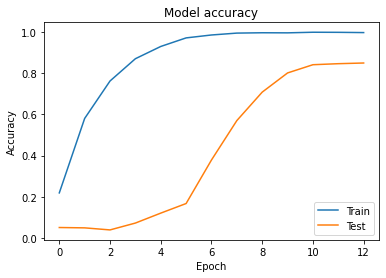

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

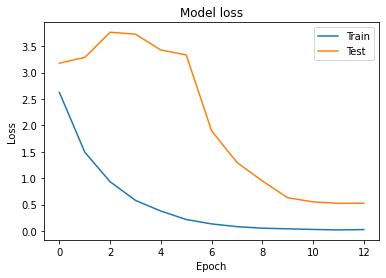

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/lip_reading/NewModel(85).h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/lip_reading/NewModel(85).h5")

In [ ]:
y_pred=model.predict(X_test)
print(y_pred)

[[9.8398799e-01 2.8394982e-07 2.8237064e-05 ... 1.2795229e-05
  1.2576140e-05 3.5251189e-05]
 [1.7388520e-03 6.7917752e-04 2.8869408e-04 ... 6.3132553e-04
  2.9481258e-04 9.5328224e-01]
 [4.7809590e-05 9.7724199e-01 1.0418730e-03 ... 1.5597603e-04
  1.5377487e-03 3.2908568e-04]
 ...
 [2.3997175e-03 2.2086233e-03 8.7117665e-03 ... 1.6050864e-02
  7.1355410e-02 4.2443603e-01]
 [4.7454091e-06 1.4071006e-07 3.4713582e-06 ... 2.3598348e-05
  1.4008172e-05 7.0945162e-04]
 [1.5700866e-02 2.6605686e-03 1.5680874e-03 ... 3.8041547e-04
  3.4810184e-03 6.6662300e-03]]


In [ ]:
y_pred = np.argmax(y_pred,axis = 1)
Y_test_ = np.argmax(Y_test,axis = 1)
print(y_pred)
print(Y_test)

[ 0 19  1  5 10 11  1 11  0 17  5  1  4 16 17 10  7  7 18  9  4  6  9  8
 16  9  0  2  5  4  0  6 14  5  9 18 14 12  9  9 19  6 19 12 18 14  5  1
 16  0  9 11  0  1 15 10 15 17  7  0 11  1  4  6  5 19  7  9 18 12  9  6
 10 12 10  9 13 12  7  8  4  3 19  5  0 14 12 13  7  8 16  6  9  6 16  1
  3  9 17 12 17  0  8  0  3  6 16 11  1  4 18 10 10  4  9 13  0 11  7 12
 16 11 15 17  0 17 19  5 11 12 17 17  1 19 12  3 19 16  6 14 12  6 12 17
  2  5 16 17  1  5  3  7  5 16 15  7 18 14  1 15 10  6  4 15 15 12  6  1
  8 13  7 10 10 16 19  1  4 19 13 14  6  7  3  6 12  1 19 10  2  9 14  3
 16  1  2  0 16 12  3  5  2 19  1  8 14 16 15 15  8  0 18 11 11 12 19  7
  3  1  0  1 12 16 18 19  1  8 13  3  2  8  4  3 17  7  0  4 16 13 14  5
  7  1  3  2 14  4 17  8  8 16  8  9 17  9 10  4 16  8  9 15 15  7 17  9
 19 12  0  4 18  1 16  5  6 13 10 10 12 11 14 16 15 16  9  4 19 10 15  9
 17 11 19 13 19 18 12  9 18  3 13  0 10 15  7 16  2 11  3 15 16 12 16 19
  5  3 13 16 14 15  1  2 17  7  9  2  5  3  3 12  1

In [ ]:
from sklearn import metrics 
metrics.accuracy_score(Y_test_,y_pred)

0.85

In [ ]:
image = cv2.imread('/content/drive/MyDrive/lip_reading/mouth3/F04/03/02/image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (224,224))
gray = (gray - np.min(gray))/(np.max(gray)-np.min(gray))
gray = np.nan_to_num(gray)  
gray = gray.reshape(1,224,224,1)

In [ ]:
_pred=model.predict(gray)
print(_pred)
_pred = np.argmax(_pred,axis = 1)
print(_pred)

[[7.3549367e-05 5.2999699e-04 9.6812248e-01 4.3704832e-04 2.1983798e-05
  4.0089937e-05 2.9082348e-06 3.2174805e-06 3.4963211e-06 3.8461389e-03
  2.4148176e-04 4.8894672e-06 5.7836824e-06 5.2966982e-07 2.5709022e-02
  4.6427081e-06 1.1129764e-06 9.2042034e-04 6.2004838e-06 2.4979992e-05]]
[2]


In [ ]:
cf_matrix = metrics.confusion_matrix(Y_test_,y_pred)

<Figure size 432x288 with 0 Axes>

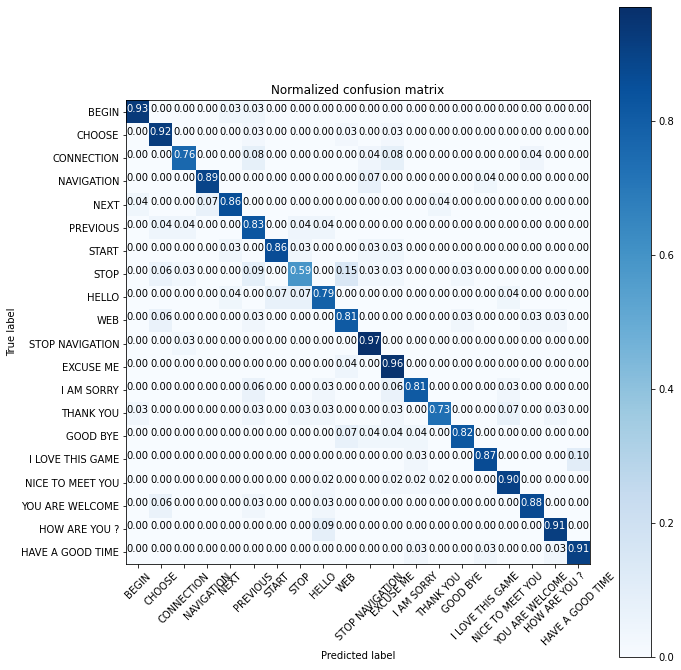

In [ ]:
class_names =["BEGIN","CHOOSE","CONNECTION","NAVIGATION","NEXT","PREVIOUS","START","STOP","HELLO","WEB",
                       "STOP NAVIGATION","EXCUSE ME","I AM SORRY","THANK YOU","GOOD BYE","I LOVE THIS GAME",
                       "NICE TO MEET YOU","YOU ARE WELCOME","HOW ARE YOU ?","HAVE A GOOD TIME"]
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test_, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()